In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

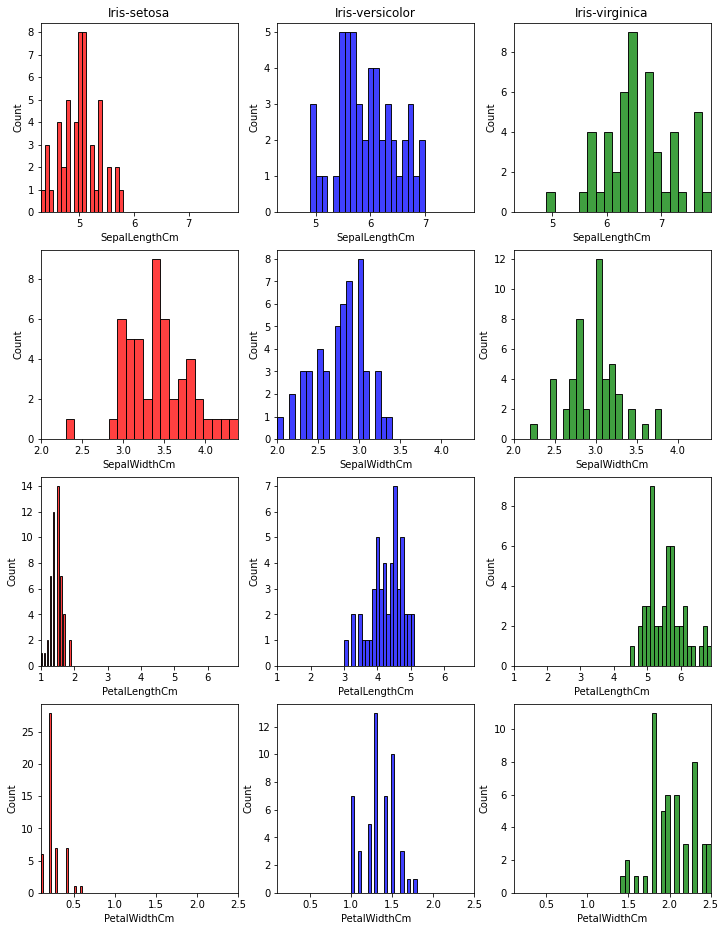

In [50]:
# Plotting histograms of all variables
features = list(data.columns)
for v in ['Id', 'Species']:
    features.remove(v)

labels = list(data['Species'].unique())

COLORS = ['r', 'b', 'g']

fig, axs = plt.subplots(4, 3, figsize=(12, 16))

for irow, feat in enumerate(features):
    
    xlim = (data[feat].min(), data[feat].max())
    for icol, lab in enumerate(labels):
        ax = axs[irow, icol]
        if irow == 0:
            ax.set_title(lab)
            
        sns.histplot(
            data[(data['Species'] == lab)][feat],
            bins=20,
            color=COLORS[icol],
            ax=ax
        )
        ax.set_xlim(xlim)
    

In [51]:
import itertools as it

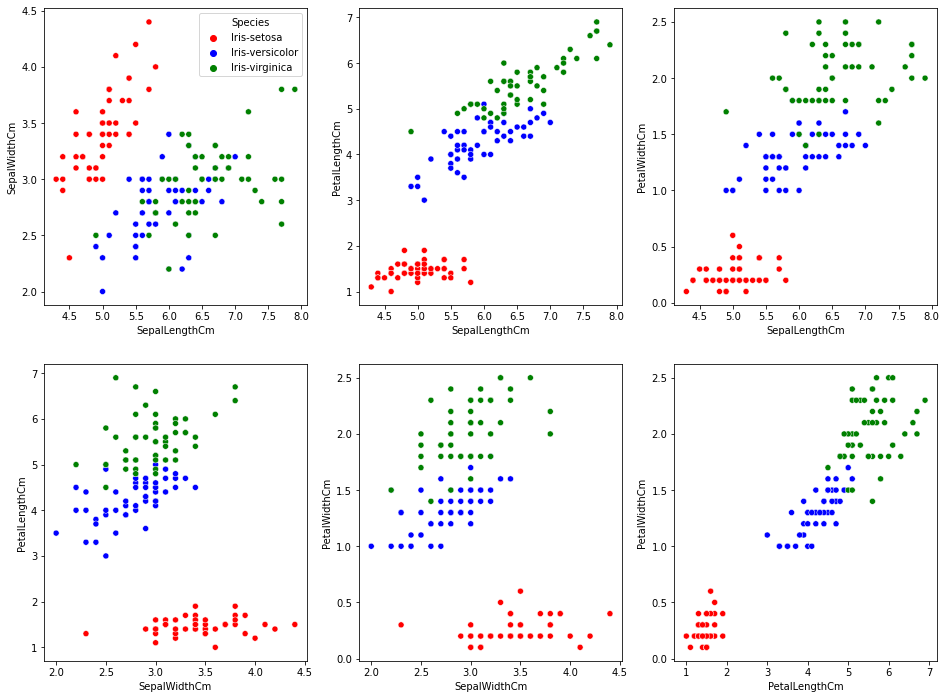

In [66]:
# Plotting scatter plot 2-by-2
feat_pairs = list(it.combinations(features, 2))

fig, axs = plt.subplots(2, 3, figsize=(16, 12))
axs = list(axs.flatten())

for pair, ax in zip(feat_pairs, axs):
    sns.scatterplot(
        data=data,
        x=pair[0],
        y=pair[1],
        hue='Species',
        ax=ax,
        palette=COLORS,
        legend=(pair == feat_pairs[0])
    )

## Classification

In [84]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [72]:
X = data[features]
y = data['Species']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
# Scaling data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [99]:
# LogisticRegression
lr_clf = LogisticRegression(C=100).fit(X_train_std, y_train)

In [96]:
param_range = [0.01, 0.1, 1.0, 10., 100., 1000, 10000]
train_scores, test_scores =  validation_curve(
    estimator=lr_clf,
    X=X_train_std,
    y=y_train,
    cv=5,
    param_name='C',
    param_range=param_range
)

In [97]:
train_score_mean = np.mean(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
train_score_error = np.std(train_scores, axis=1)
test_score_error = np.std(test_scores, axis=1)

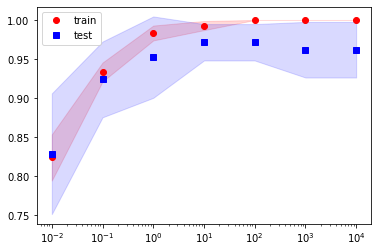

In [98]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(param_range, train_score_mean, color=COLORS[0], linestyle='none',
        marker='o', label='train')
ax.fill_between(param_range, train_score_mean + train_score_error,
                train_score_mean - train_score_error, alpha=0.15,
                color=COLORS[0])
ax.plot(param_range, test_score_mean, color=COLORS[1], linestyle='none',
        marker='s', label='test')
ax.fill_between(param_range, test_score_mean + test_score_error,
                test_score_mean - test_score_error, alpha=0.15, color=COLORS[1])
ax.legend()

In [100]:
lr_clf.fit(X_train_std, y_train)

LogisticRegression(C=100)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
y_pred = lr_clf.predict(X_test_std)

In [104]:
conf_mat = confusion_matrix(y_test, y_pred)

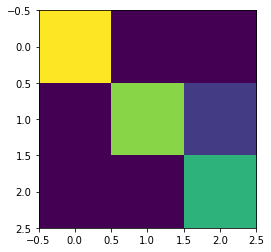

In [106]:
plt.imshow(conf_mat)